# 数据项目 - 泰坦尼克号幸存者分析

在下面的链接查看“Kaggle泰坦尼克号挑战杯”竞赛内容：

https://www.kaggle.com/c/titanic-gettingStarted

注意：您需要创建一个帐户才能访问数据。

加载包，查看泰坦尼克号乘客数据

In [1]:
#使用pandas打开
import pandas as pd
from pandas import Series,DataFrame

# 把泰坦尼克号的csv文件设置为DataFrame
titanic_df = pd.read_csv('data/train.csv')

# 预览数据
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# 我们也可以获取数据集的总体信息
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


数据集中共有12个字段，PassengerId：乘客编号，Survived：乘客是否存活，Pclass：乘客所在的船舱等级；Name：乘客姓名，Sex：乘客性别，Age：乘客年龄，SibSp：乘客的兄弟姐妹和配偶数量，Parch：乘客的父母与子女数量，Ticket：票的编号，Fare：票价，Cabin：座位号，Embarked：乘客登船码头。 共有891位乘客的数据信息。其中277位乘客的年龄数据缺失，2位乘客的登船码头数据缺失，687位乘客的船舱数据缺失。

所有好的数据分析项目都是从回答问题开始的。
现在，我们已经知道了列类别的数据，让我们来思考一些我们想从数据中得到的问题或见解。
这里有一个问题列表，我们将用新的数据分析技巧来回答这个问题!

一些基本的问题:

    1). 泰坦尼克号上的乘客是谁?(年龄、性别、阶级、…等)
    2). 乘客位于哪一级甲板？这和他们的船舱等级有什么关系?
    3). 乘客是从哪里来的?
    4). 谁独自一人，谁和家人在一起?
   
然后我们再深入探讨一个更广泛的问题:

    5). 是什么因素帮助人们在沉船事故中幸存下来?

那么让我们从第一个问题开始：谁是泰坦尼克号的乘客？

In [2]:
# 首先加载分析和可视化所需要的包
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### python作图已成为数据分析中不可或缺的手段，常使用的包为matplotlib，它被很多其它包所依赖，例如pandas中具有的绘图功能就是对matplotlib的API的二次封装使用，本数据项目中较多用到的seaborn包则提供了一种新的绘图功能，其简单易行的封装功能带来更为强大和美观的绘图效果。了解可参见：http://blog.csdn.net/suzyu12345/article/details/69029106

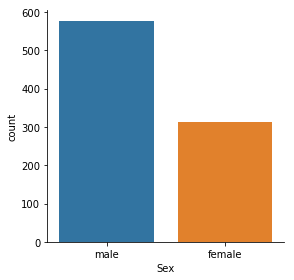

In [3]:
# 查看乘客的性别
sns.factorplot('Sex',kind= 'count',data=titanic_df)

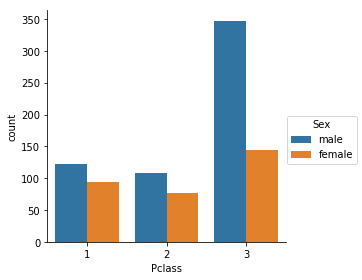

In [4]:
# 为了更细化，我们显示以Pclass作为X轴，统计每个等级中的男女比例
sns.factorplot('Pclass',kind='count',data=titanic_df,hue='Sex')

哇，第三等级的男性比女性多，这是一个有趣的发现。然而，了解男性、女性和儿童的分离可能是有用的。我们该怎么做呢?

In [5]:
# 我们将16岁以下的任何一个人视为一个孩子，然后使用apply方法创建一个新的列

# 首先写一个按性别分类的函数
def male_female_child(passenger):
    # 以年龄和性别为基础
    age,sex = passenger
    # 比较年龄，如果大于16就按性别分离数据
    if age < 16:
        return 'child'
    else:
        return sex
    

# 我们将定义一个名为“person”的新列，请记住为column指定axis = 1而不指定index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [6]:
# 检查是否有效，查看前10行
titanic_df[0:10]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

太好了！ 现在我们已经把乘客分成了男，女，小孩。 由于著名的“妇女儿童优先”政策，这将在以后很重要！

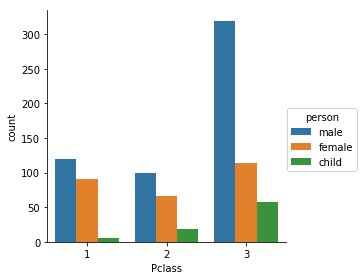

In [7]:
# 再次使用factorplot画图
sns.factorplot('Pclass',kind='count',data=titanic_df,hue='person')

有趣的是，相当一部分的孩子是三等舱的，一等舱的孩子不多！ 我们如何创造一个年龄的分布，以更准确地了解乘客是谁呢。

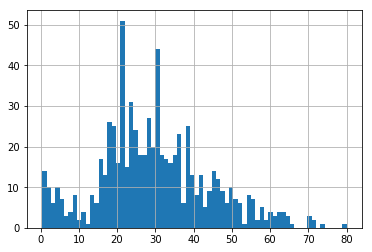

In [8]:
#用pandas 快速制作直方图
titanic_df['Age'].hist(bins=70)

In [9]:
# 我们也可以快速比较男性，女性，小孩
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

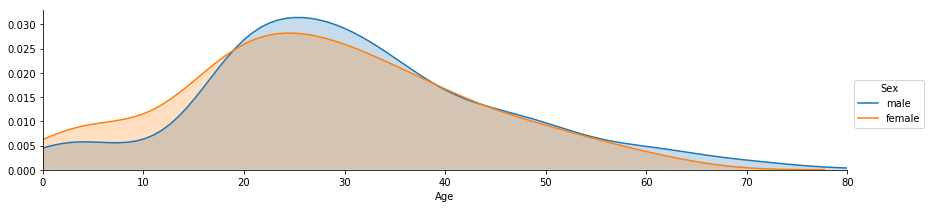

In [10]:
# 另一种可视化数据的方式是使用FacetGrid在一个绘图上绘制多个子图
# FacetGrid分面网格图，hue参数控制分组
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# 接下来使用map通过选择hue来绘制“年龄”列的所有可能的曲线图
#kdeplot 核密度图
fig.map(sns.kdeplot,'Age',shade= True)

# 通过年龄最大的乘客设置x的值的范围
oldest = titanic_df['Age'].max()

#我们知道没有人的年龄为负数，因此，x下限设为0
fig.set(xlim=(0,oldest))

#最后添加一个图
fig.add_legend()

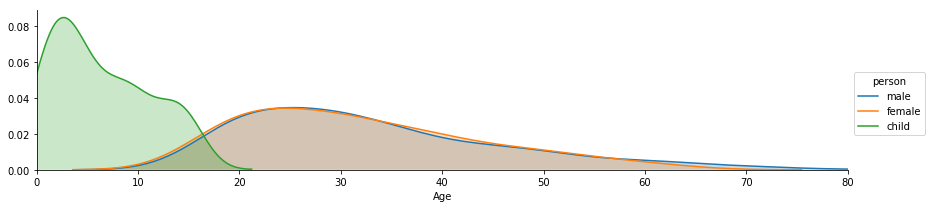

In [12]:
# 我们可以为“person”列做同样的图来，包括children：

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

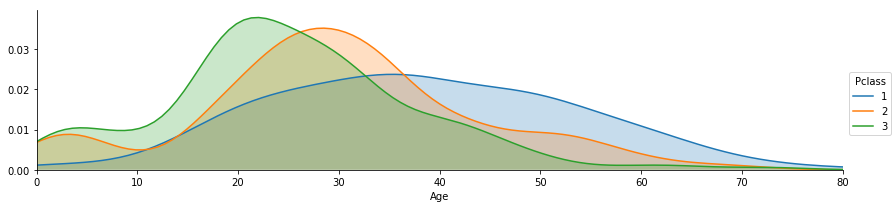

In [13]:
#通过改变hue参数为等级（class）做出同样的图：
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


我们已经很好地了解乘客是以性别，年龄和阶级为基础的。 那么让我们继续谈谈我们的第二个问题：乘客上了哪些甲板，这与他们的船舱级别有什么关系？

In [14]:
# 再次迅速浏览一下数据集
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

所以我们可以看到Cabin栏里有关于甲板的信息，但是它有几个NaN值，所以我们不得不放弃它们。

In [15]:
# 首先，我们将放弃NaN值并创建一个新的对象 deck
deck = titanic_df['Cabin'].dropna()

In [16]:
# 快速预览一下decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

注意我们只需要甲板的第一个字母来分类它的等级（例如A，B，C，D，E，F，G）

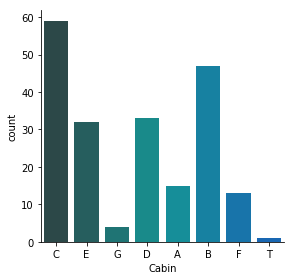

In [17]:
# 所以让我们用一个简单的for循环来抓住这个甲板层次的字母
# 设置一个空列表
levels = []

# 循环抓取第一个字母
for level in deck:
    levels.append(level[0])    

# 重新定义DataFrame，并作图
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',kind='count',data=cabin_df,palette='winter_d')

有趣的是，我们有一个没有意义的'T'甲板，我们可以用下面的代码删除：

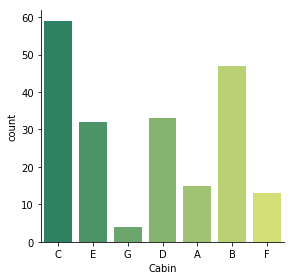

In [18]:
# 重新定义cabin_df，但是不包括Cabin为'T'的行
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#重新画图
sns.factorplot('Cabin',kind='count',data=cabin_df,palette='summer') #palette为调色板

快速提示：我使用“winter_d”和“summer”作为我的调色板，但是您可以选择任何想要的调色板。 查看更多调色板名称的链接，您可以将“_d”添加到任何调色板名称的末尾以使其变暗。

链接：http://matplotlib.org/users/colormaps.html

我们已经分析了甲板的分布，让我们继续回答我们的第三个问题：

     3.）乘客从哪里来？

In [19]:
# 再次预览原始数据
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

注意，在这里，Embarked(登船港)列有C、Q和S值。
读到关于Kaggle的项目，你会注意到这些代表的是瑟堡，皇后镇，南安普敦。

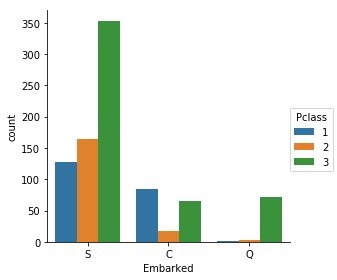

In [20]:
# 现在我们可以做一个快速的因子图来检查结果，注意x_order参数是用来处理NaN值的
sns.factorplot('Embarked',kind='count',data=titanic_df,hue='Pclass',row_order=['C','Q','S'])

一个有趣的发现是，在皇后镇，几乎所有登上的乘客都是三等舱。 在那段时间内对小镇的经济做进一步调查将会非常有趣。
现在我们来看看第四个问题：

     4.）谁是独自一人，谁和家人在一起？

In [21]:
# 我们先来添加一个新的列来单独定义
# SibSp：乘客的兄弟姐妹和配偶数量，Parch：乘客的父母与子女数量
# 我们将使用sibsp添加父/子列
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

现在我们知道，如果单独的列不是0，那么这个乘客就有了家人，并不孤单。 现在我们来修改一下，如果这个值大于0，我们就知道这个乘客是和他/她的家人在一起的，否则他们就是一个人。

In [22]:
#查找> 0或== 0来设置独立状态
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# 请注意，有时可以忽略弹出的错误。 欲了解更多信息，请查看此链接
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
# 让我们检查一下，确保它有效
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person        Alone  
0      0         A/5 21171   7.2500   NaN        S    male  With Family  
1      0          PC 17599  71.2833   C85        C  female  With Family  
2      0  STON/O2. 3101282   7.9250   NaN        S  female        Alone  
3      0            113803  53.1000  C123        S  female  With Family  
4      0            373450   8.0500   NaN        S    male        Alone

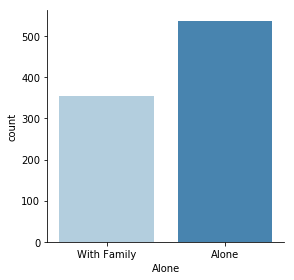

In [24]:
# 现在做一个简单的可视化
sns.factorplot('Alone',kind='count',data=titanic_df,palette='Blues')

做得好！ 现在我们已经对数据进行了全面的分析，让我们继续看看最有趣的（也是开放式的）问题：什么因素帮助人们幸免于难？

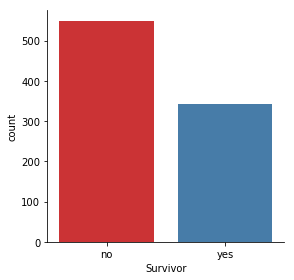

In [25]:
# 我们首先通过映射创建一个可读性的新列
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# 快速浏览一下生存或死亡的情况
sns.factorplot('Survivor',kind='count',data=titanic_df,palette='Set1')

所以，死亡的人数比活下来的人多了很多。让我们来看看等级是否对乘客的生存率有影响，因为电影“泰坦尼克号”（Titanic）普及了三级乘客不如一，二级乘客的观点。

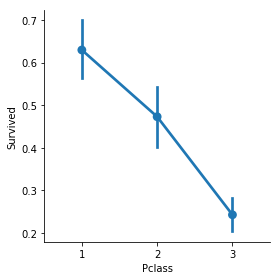

In [26]:
# 让我们再次使用一个因子图，但现在考虑的是等级
sns.factorplot('Pclass','Survived',data=titanic_df)

看起来像三等客舱的生存率是最低的！ 但也许这种效应是由于三等舱的男子是因为妇幼优先的政策而造成的。 让我们用'hue'来得到一个更清晰的画面。

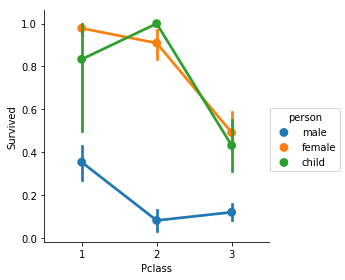

In [27]:
# 让我们再次使用一个因子图，但现在考虑等级和性别
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

从这些数据看来，男性和三等舱都是不利于生存的因素。 即使不分阶级，作为任何阶级男性都会大大降低生存机会。

但是年龄呢？ 年龄大小是否对生存率有影响？

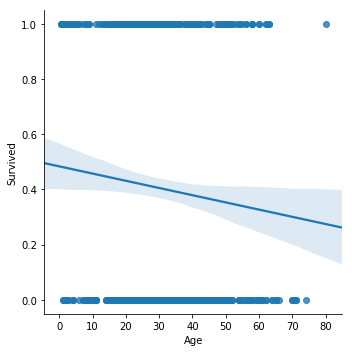

In [28]:
# 让我们使用线性图来描述年龄与生存率的关系
# lmplot 是一种集合基础绘图与基于数据建立回归模型的绘图方法。旨在创建一个方便拟合数据集回归模型的绘图方法，
#利用'hue'、'col'、'row'参数来控制绘图变量。

#同时可以使用模型参数来调节需要拟合的模型：order、logistic、lowess、robust、logx。
sns.lmplot('Age','Survived',data=titanic_df)

看起来总体趋势是乘客年龄越大，他们生存的可能性越小。 让我们继续，用hue来看看阶级和年龄的影响。

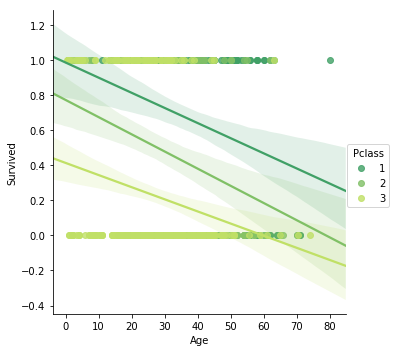

In [29]:
# 画出年龄与生存率的线性图，使用hue进行等级的分离
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='summer')

在船舱等级上也是一样，乘客年龄越大，他们生存的可能性越小

我们也可以使用x_bin参数来清洗这个数字，然后抓取数据，并用附加的std来存储数据。

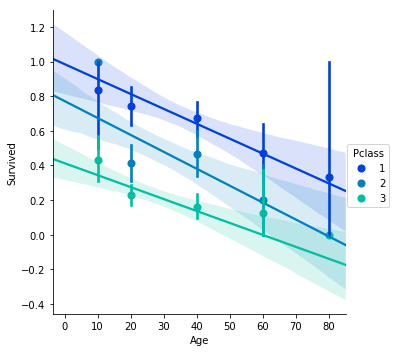

In [30]:
# 画出年龄与生存率的线性图，使用hue进行等级的分离
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

 如果我们把性别和年龄与生存率联系起来呢？

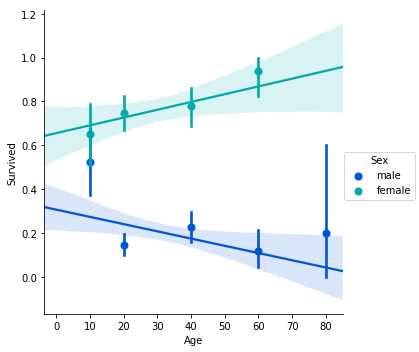

In [31]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

太棒了!
我们对性别、年龄和等级与乘客的生存率的关系有了非常深入的了解。
现在你来控制:回答以下问题，使用pandas和seaborn:

    1). 甲板对乘客的存活率有影响吗?这个答案和你的直觉相符吗?
    2). 是否"有家庭成员"增加了幸存的几率?


#### 最后，给你留下来自电影泰坦尼克号我最喜欢的场景gif

In [32]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')

如果您愿意，可以继续使用这些免费的公共数据集资源（但愿您能访问）：

http://www.data.gov/

http://aws.amazon.com/public-data-sets/

http://www.google.com/publicdata/directory